<a href="https://colab.research.google.com/github/lucacbbi/Projetos_data_science/blob/main/Propaga%C3%A7%C3%A3o_em_Redes_Neurais_Teoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O preditor $\hat{y}$ é obtido (neste caso) a partir da ativação de $z=w^T x + b$ pela função sigmóide. Tudo isso fica assim:

$$
\hat{y} = \sigma(z) = \sigma(w^T x + b) = \frac{1}{1 + e^{-z}}
$$

> *Note que eu substitui o símbolo $\theta$, usado na última aula, por $w$. Estou menos preocupado com o rigor matemático e exatidão da forma que com o aprendizado efetivo.*


Também entendemos que, dado um conjunto de amostras de treinamento $\{ (x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \dots, (x^{(m)}, y^{(m)}) \}$, queremos obter $\hat{y}^{(i)} \approx y^{(i)}$.

Seguindo a notação matemática de usar o índice $i$ sobrescrito para representa a *i-nésima* amostra, pode-se generalizar;

$$
\hat{y}^{(i)} = \sigma(z^{(i)}) = \frac{1}{1 + e^{-z^{(i)}}}
$$

#### 2. *Cost Function*


**Como saber se nosso algoritmo está indo bem**

A primeira coisa que temos que mensurar é o quão distante estamos da solução correta. 

Este é um problema de regressão logística. Se você está mais familiarizado com Cálculo, sabe que cairíamos em um espaço de soluções não-convexo. Na prática, teríamos vários ótimos locais, fazendo com que o *Gradient Descent* não funcione bem.

Para trabalhar um problema de otimização convexo, utilizamos a seguinte *Loss Function*:

$\mathcal{L}(\hat{y}, y) = - (y \log \hat{y} + (1 - y)log(1 - \hat{y}))$

*Loss function* é quando aplicamos $\mathcal{L}$ a uma amostra. 

***Cost Function***  é quando consideramos todo o *dataset*, e queremos obter o custo do erro das previsões: 

$$
J(w, b) = \frac{1}{m} \sum_{i=1}^{m}\mathcal{L}(\hat{y}^{(i)}, y^{(i)}) \\
J(w, b) = - \frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log \hat{y}^{(i)} + (1 - y^{(i)})log(1 - \hat{y}^{(i)})]
$$


In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
compras = np.array([[1,2,3],
                   [0,3,4],
                   [2,5,6]])

preco = np.array([10,20,30]).reshape(1,-1)

In [3]:
preco[0][1]

20

In [4]:
preco*compras

array([[ 10,  40,  90],
       [  0,  60, 120],
       [ 20, 100, 180]])

In [5]:
np.dot(preco, compras.T)

array([[140, 180, 300]])

In [6]:
for i,j in enumerate(compras):
    #cliente
    total = 0
    print('\nCliente {}'.format(i))
    for i,j in enumerate(j):
      total +=j*preco[0][i]
      print('Preço: {}'.format(j*preco[0][i]))
    print('Total:',total)  


Cliente 0
Preço: 10
Preço: 40
Preço: 90
Total: 140

Cliente 1
Preço: 0
Preço: 60
Preço: 120
Total: 180

Cliente 2
Preço: 20
Preço: 100
Preço: 180
Total: 300


In [7]:
# download do dataset cat vs non-cat
!wget -q https://raw.githubusercontent.com/carlosfab/escola-data-science/master/datasets/catvsnoncat/train_catvnoncat.h5
!wget -q https://raw.githubusercontent.com/carlosfab/escola-data-science/master/datasets/catvsnoncat/test_catvnoncat.h5
# Importar os dados do arquivo .h5
train_dataset = h5py.File('train_catvnoncat.h5', 'r')
test_dataset = h5py.File('test_catvnoncat.h5', 'r')
# dados de treino
train_x = np.array(train_dataset['train_set_x'][:])
train_y = np.array(train_dataset['train_set_y'][:])

# dados de teste
test_x = np.array(test_dataset['test_set_x'][:])
test_y = np.array(test_dataset['test_set_y'][:])

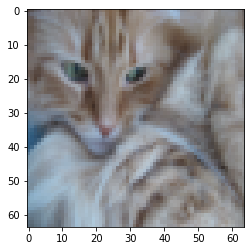

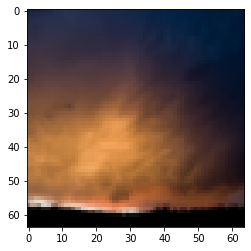

In [8]:
# ver o exemplo de uma imagem cat vs non-cat
idx_cat = np.where(train_y == 1)[0][0]
idx_noncat = np.where(train_y == 0)[0][0]

plt.imshow(train_x[idx_cat])
plt.show()
plt.imshow(train_x[idx_noncat])
plt.show()

In [9]:
# Shape
for _,s in enumerate([train_x,train_y,test_x,test_y]):
  print(s.shape)

(209, 64, 64, 3)
(209,)
(50, 64, 64, 3)
(50,)


In [10]:
amostras_train = train_x.shape[0]
amostras_test = test_x.shape[0]

In [11]:
train_x_fatten=train_x.reshape(amostras_train,-1).T
train_y_fatten=train_y.reshape(amostras_train,-1).T
test_x_fatten=test_x.reshape(amostras_test,-1).T
test_y_fatten=test_y.reshape(amostras_test,-1).T

In [12]:
# Shape
for _,s in enumerate([train_x_fatten,train_y_fatten,test_x_fatten,test_y_fatten]):
  print(s.shape)

(12288, 209)
(1, 209)
(12288, 50)
(1, 50)


In [13]:
train_x_fatten=train_x_fatten /255
train_y_fatten=train_y_fatten /255


In [14]:
def propagate(X,Y):
  m = X.shape[1]

  w = np.zeros((X.shape[0],1))
  b = 0

  z = np.dot(w.T,X) + b
  
  A = 1/(1 + np.exp(-z))

  coast = (-1/m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))

  return coast

In [15]:
X, Y =  np.array([[1,2], [3,4]]) , np.array([[1, 0]])
cost = propagate(X, Y)
print ("cost =", cost)

cost = 0.6931471805599453
